Laboratorio 1 - Procesamiento Digital de Señales

Alumno: Brian Rodrigo Morales Linares

Pregunta 1) 

Parte a)

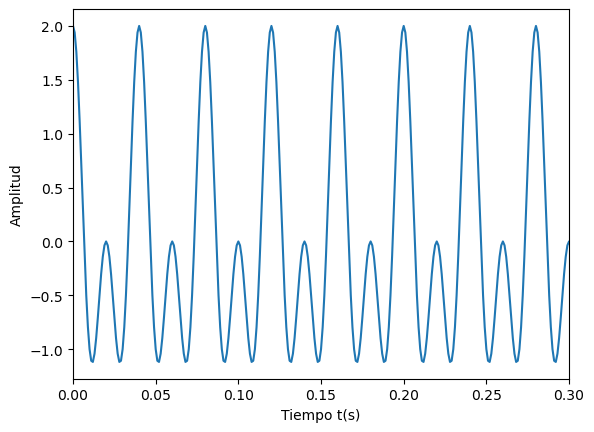

La máxima frecuencia será: 50.0


In [144]:
#Importamos librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

#Definimos el vector de tiempo con pasos de 0.001 segundos de 0 a 1
t=np.arange(0,1,0.001)

#Definimos la frecuencia continua omega
omega_o=50*np.pi

#Ahora definiremos la señal x(t)
x_t=np.cos(omega_o*t)+np.cos(2*omega_o*t)

#Vamos a plotear la señal x_t
plt.plot(t,x_t)
plt.xlabel("Tiempo t(s)")
plt.ylabel("Amplitud")
plt.xlim([0,0.3])
plt.show()

f1=omega_o/(2*np.pi)
f2=2*omega_o/(2*np.pi)
print(f"La máxima frecuencia será: {f2}")

Parte b)

Ploteamos la señal en el tiempo discreto

x(t)=cos(omega_o*t)+cos(2*omega_o*t)

x(nT)=cos(omega_o*n*T1))+cos(2omega_o*n*T1))

La frecuencia de muestreo para  el primer caso será: 120


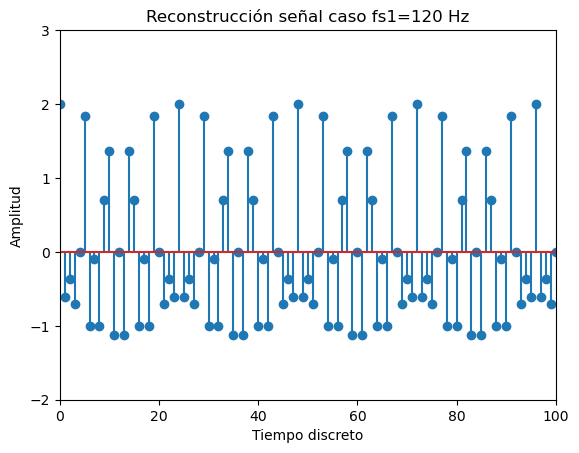

In [150]:
#Primero muestreamos la señal con fs1=120 Hz
#Definimos la frecuencia de muestreo 1

#Definimos omega_o
omega_o=50*np.pi
#Definimos fs1 para hallar Ts1
fs1=120
Ts1=1/120
print(f"La frecuencia de muestreo para  el primer caso será: {fs1}")

#Definimos el vector de tiempo discreto con un numero de muestras igual a 200
n=np.arange(0,200,1)

#Definimos la señal muestreada x_n1
x_n1=np.cos(omega_o*n*Ts1)+np.cos(2*omega_o*n*Ts1)

#Ploteamos nuestra señal muestreada
plt.stem(n,x_n1)
plt.xlabel("Tiempo discreto")
plt.title("Reconstrucción señal caso fs1=120 Hz")
plt.ylabel("Amplitud")
plt.xlim([0,100])
plt.ylim([-2,3])
plt.show()

Para el primer caso como nuestra frecuencia de muestreo (120) es mayor o igual que dos veces nuestra frecuencia máxima (2*50), sí es posible reconstruir la señal original.

La frecuencia de muestreo para el segundo caso será: 625.0


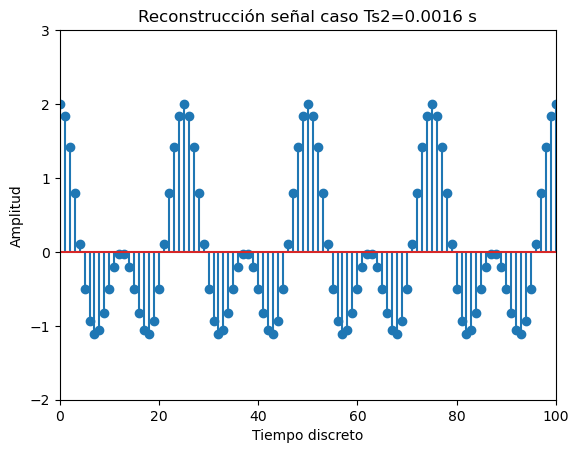

In [151]:
#Segundo muestreamos la señal con Ts2=0.0016s

#Definimos omega_o
omega_o=50*np.pi
#Definimos Ts2
Ts2=0.0016
print(f"La frecuencia de muestreo para el segundo caso será: {1/Ts2}")
#Definimos el vector de tiempo discreto con un número de muestras
n=np.arange(0,200,1)
#Definimos la señal muestreada x_n2
x_n2=np.cos(omega_o*n*Ts2)+np.cos(2*omega_o*n*Ts2)

plt.stem(n,x_n2)
plt.xlabel("Tiempo discreto")
plt.title("Reconstrucción señal caso Ts2=0.0016 s")
plt.ylabel("Amplitud")
plt.xlim([0,100])
plt.ylim([-2,3])
plt.show()

Para el segundo caso como nuestra frecuencia de muestreo (625) es mayor o igual que dos veces nuestra frecuencia máxima (2*50), si es posible reconstruir la señal original.

Parte c)

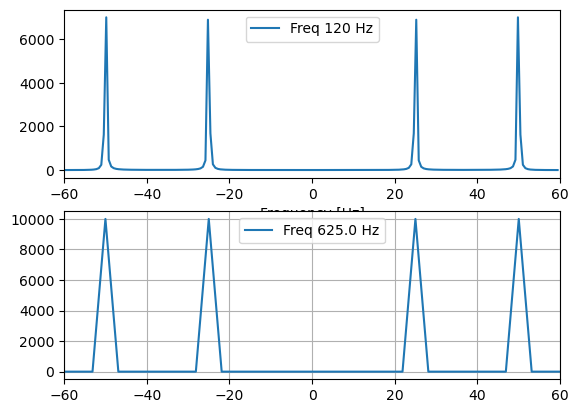

In [159]:
# Análisis en frecuencia
#Hallamos la fft de la señal muestrada x_n1 y alineamos el espectro de frecuencia
fft_s1 = np.fft.fftshift(np.fft.fft(x_n1))
#Hallamos la fft de la señal muestrada x_n2 y alineamos el espectro de frecuencia
fft_s2 = np.fft.fftshift(np.fft.fft(x_n2))

#Hallamos la densidad espectral de potencia para observar de mejor manera X1(w) X2(w)
Xw_1 = np.abs(fft_s1)**2
Xw_2 = np.abs(fft_s2)**2

#Definimos el vector frecuencia 
freq1 = (np.arange(200) - 200/2) * fs1 / 200
freq2 = (np.arange(200) - 200/2) * (1/Ts2) / 200

#Ploteamos nuestros espectros
plt.subplot(2,1,1)
plt.plot(freq1,Xw_1,label='Freq '+str(fs1)+' Hz')
plt.xlabel('Frequency [Hz]')
plt.xlim([-60,60])
plt.legend(loc='upper center')
plt.subplot(2,1,2)
plt.plot(freq2,Xw_2,label='Freq '+str(1/Ts2)+' Hz')
plt.xlim([-60,60])
plt.grid('on')
plt.legend(loc='upper center')
plt.show()

Pregunta 2)

Parte a)

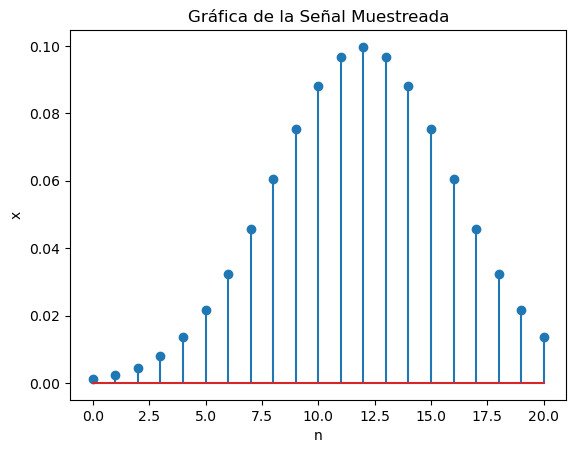

In [160]:
#Tenemos la siguiente señal muestreada
n, x = np.linspace(0, 20, 21), (1 / (4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.linspace(0, 20, 21) - 12) / 4) ** 2)
#Ploteamos la señal muestreada
plt.stem(n,x)
plt.xlabel('n')
plt.ylabel('x')
plt.title('Gráfica de la Señal Muestreada')
plt.show()

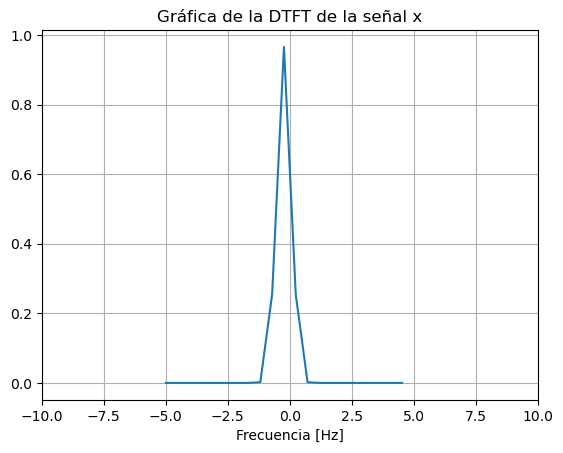

In [88]:
#Definimos el periodo de muestreo
Ts1=0.1
fs=1/Ts1

#Definimos la frecuencia de corte como la mitad de Ts1
fc=1/(2*Ts1)

#Hallamos la fft de x
x_fft = np.fft.fftshift(np.fft.fft(x))
X = np.abs(x_fft)**2
freq= (n - len(n)/2) * fs / len(n)

#Plotemos la DTFT de x
plt.plot(freq,X)
plt.xlim([-fs,fs])
plt.xlabel('Frecuencia [Hz]')
plt.title('Gráfica de la DTFT de la señal x')
plt.grid('on')

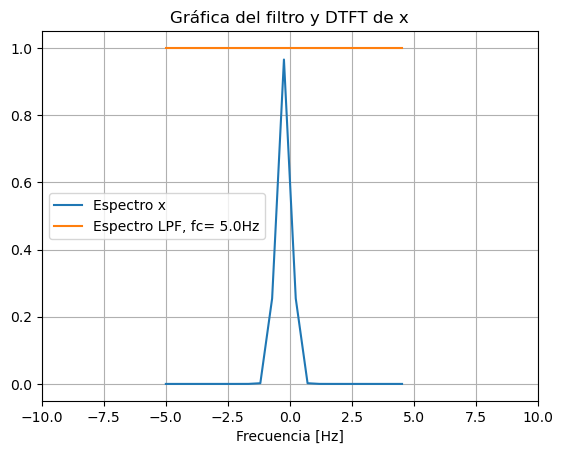

In [121]:
#Creamos el filtro pasa bajos ideal 
w=np.fft.fftfreq(len(n),Ts1) #Creamos un vector de frecuencias con la misma longitud que el vector n
fpb=np.abs(w)<=fc #Vector booleano que será 0 si los valores de nuestras frecuencias son mayores a la frecuencia de corte 

#Ploteamos la gráfica donde incluya el filtro como la DTFT
plt.plot(freq,X,label='Espectro x')
plt.plot(freq,fpb,label='Espectro LPF, fc= '+str(fc)+'Hz')
plt.xlim([-fs,fs])
plt.xlabel('Frecuencia [Hz]')
plt.title('Gráfica del filtro y DTFT de x')
plt.legend(loc='center left')
plt.grid('on')

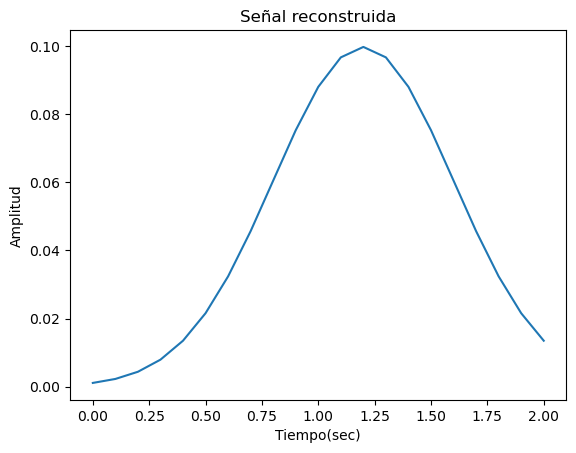

In [104]:
#Creamos el filtro pasa bajos ideal 
w=np.fft.fftfreq(len(n),Ts1)
fpb=np.abs(w)<=fc

#Reconstruimos nuestra señal
x_recons = np.fft.ifft(np.fft.ifftshift(x_fft*fpb))

#Ploteamos para comprobar que nuestra señal reconstruida sea la correcta
plt.plot(n*Ts1,x_recons)
plt.title("Señal reconstruida")
plt.xlabel("Tiempo(sec)")
plt.ylabel("Amplitud")
plt.show()

Parte b)

En el vector n tenemos valores desde 0 a 20, sin embargo en nuestro timpo va de 0 a 2s, entonces por t=n*T

vector t  0 Ts1 2Ts1 3Ts1 -> aumentará de muestra en muestra nuestro vector tiempo normalizado

vector n  0  1   2   3 

Eso quiere decir que debemos tomar el arreglo del filtro desde el elemento 0 hasta el 2 ya que por sintaxis de python tomará el elmento n=0 y n=1(Ts1)

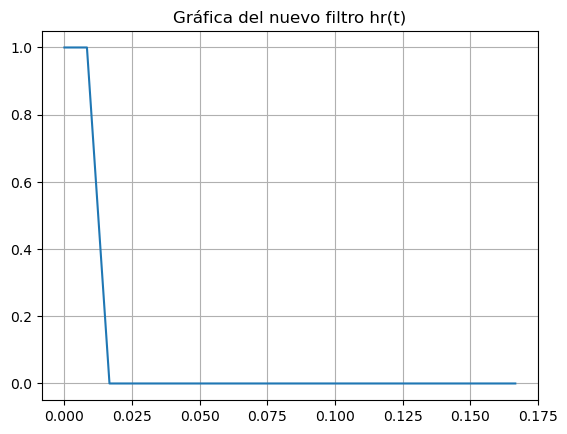

In [172]:
#Creamos el nuevo filtro

#Creamos un vector de zeros del mismo tamaño de n
filtro=np.zeros(len(n))
#Como nuestro filtro nos indica que hasta Ts1 debe ser igual a 1 entonces agarramos las dos primeras elementos del arreglo para que sean igual a 1
filtro[:2]=1

#Ploteamos la gráfica de hr(t)
plt.plot(n*Ts1,filtro)
plt.title('Gráfica del nuevo filtro hr(t)')
plt.grid('on')                    

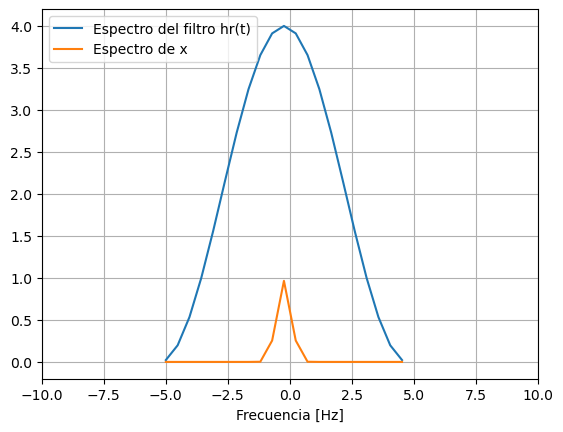

In [126]:
#Hallaremos ahora su TF con el mismo periodo de muestreo que en a)
filtro_fft = np.fft.fftshift(np.fft.fft(filtro))
X_filtro = np.abs(filtro_fft)**2

#Ploteamos la TF de hr(t) y la DTFT de x
plt.plot(freq,X_filtro,label='Espectro del filtro hr(t)')
plt.plot(freq,X,label='Espectro de x')
plt.xlabel('Frecuencia [Hz]')
plt.xlim([-10,10])
plt.legend(loc='upper left')
plt.grid('on')

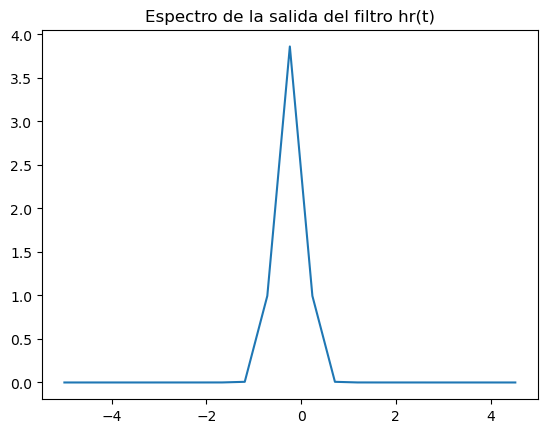

In [128]:
#Hallamos la salida del filtro
Y_fft=x_fft*filtro_fft
Y_2 = np.abs(Y_fft)**2

#Ploteamos la salida
plt.plot(freq,Y_2)
plt.title("Espectro de la salida del filtro hr(t)")
plt.show()

¿Qué nombre recibe 
este tipo de reconstrucción Nos encontramos ante un filtro pasabanda que deja pasar todo el espectro de la señal x ?

Pregunta 3)

Parte a)

La señal de muestreo es: 1500


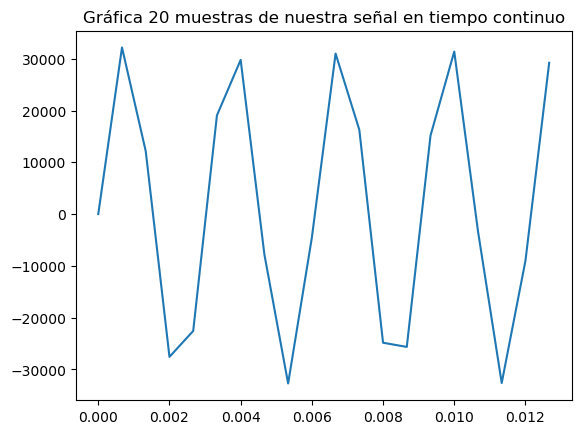

In [143]:
#importamos la libreria scipy para poder cargar el archivo
import scipy.io.wavfile as waves
archivo='alegria.wav'

#Cargamos el archivo a una señal y_t donde al utilizar la libreria scipy, nos arrojará tanto la frecuencia de muestreo como la señal de audio 
f_muestreo,y_t=waves.read(archivo)

#Imprimimos el valor de la señal de muestreo
print("La señal de muestreo es: " + str(f_muestreo))
#Definimos el  y_t pero a las primeras 20 muestras
y_t=y_t[0:20]
#Definimos el vector de n para que tenga 20 elementos
n=np.linspace(0,19,20)

#Definimos el tiempo de muestreo
T_muestreo=1/f_muestreo

#Ploteamos la señal
plt.plot(n*T_muestreo,y_t)
plt.title("Gráfica 20 muestras de nuestra señal en tiempo continuo")
plt.show()



Parte b)
Nuestra señal de muestreo es igual a 1500 

Para el primer caso que deseamos muestrear a una frecuencia igual a 700 HZ, basandonos en la figura lo primero que tendremos que hacer es pasar por la etapa de interpolation (upsamplig +filtering) es asi que al tener nuestra señal de muestreo igual a 1500Hz , el valor de L que tomará nuestro expansor será igual a 7 (L=7) , es decir se agregaran 6 ceros ahora entre muestra y muestra ,luego pasaremos por nuestro filtro pasa baja el cual su frecuencia de corte tendrá un valor igual a wc=pi/L=pi/7; luego pasaremos a otro filtro con xc=pi/M=pi/15 para luego pasar la señal por nuestro downsampling el cual tendra un valor de M=15. 1500*7=10500 Hz -- 10500/15=700 Hz.

Para el segundo caso que deseamos muestrear a una frecuencia igual a 1000 HZ, basandonos en la figura lo primero que tendremos que hacer es pasar por la etapa de interpolation (upsamplig +filtering) es asi que al tener nuestra señal de muestreo igual a 1000Hz , el valor de L que tomará nuestro expansor será igual a 2 (L=2) , es decir se agregaran 1 cero ahora entre muestra y muestra ,luego pasaremos por nuestro filtro pasa baja el cual su frecuencia de corte tendrá un valor igual a wc=pi/2=pi/2; luego pasaremos a otro filtro con xc=pi/M=pi/3 para luego pasar la señal por nuestro downsampling el cual tendra un valor de M=3. 1500*2=3000 Hz -- 3000/3=1000 Hz.